<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/7%EC%9E%A5/%EC%88%98%EC%B9%98%ED%95%B4%EC%84%9D_7%EC%9E%A5(4_1%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7장 최적화

황금분할 탐색법(교과서 그림 7.7)

1차원 최적화(강의노트 27페이지)

In [1]:

def goldmin(f, xl, xu, Ea=1.e-7, maxit=30):
    """
    Use the golden-section search to find the minimum of f(x)

    input:
        f    = function to minimize
        xl   = lower initial guess
        xu   = upper initial guess
        Ea   = absolute relative error criterion (default = 1.e-7)
        maxit = maximum number of iterations (default = 30)

    output:
        xopt  = location of the minimum
        f(xopt) = function value at the minimum
        ea    = absolute relative error achieved
        iter  = number of iterations required
    """

    # Golden ratio
    phi = (1 + np.sqrt(5)) / 2
    d = (phi - 1) * (xu - xl)

    # Initial points
    x1 = xl + d
    f1 = f(x1)
    x2 = xu - d
    f2 = f(x2)

    for i in range(maxit):
        xint = xu - xl

        if f1 < f2:
            xopt = x1
            xl = x2
            x2 = x1
            f2 = f1
            x1 = xl + (phi - 1) * (xu - xl)
            f1 = f(x1)
        else:
            xopt = x2
            xu = x1
            x1 = x2
            f1 = f2
            x2 = xu - (phi - 1) * (xu - xl)
            f2 = f(x2)

        # Compute error (handling division by zero)
        if abs(xopt) > 1e-12:
            ea = (2 - phi) * abs(xint / xopt)
            if ea <= Ea:
                break
        else:
            ea = float('inf')

    return xopt, f(xopt), ea, i + 1

예제 7-1

In [ ]:
g = 9.81 #m/s2
v0 = 55 #m/s
m = 80 #kg
c = 15 #kg/s
z0 = 100 #m

def f(t):
     return -(z0 + (m/c)*(v0 + m*g/c)*(1 - np.exp(-c/m*t)) - (m*g/c)*t)

tl = 0
tu = 8
tmin, fmin, ea, n = goldmin(f,tl,tu, Ea=1.e-5)

print('Time at maximum altitute = {0:5.2f} s'.format(tmin))
print('Function value = {0:6.2g}'.format(fmin))
print('Relative error = {0:7.2e}'.format(ea))
print('Interation required = {0:4.0f}'.format(n))

zmax = z0 + (m/c)*(v0 + m*g/c)*(1 - np.exp(-c/m*tmin)) - (m*g/c)*tmin
print('Maximum altitude = {0:6.2f} m'.format(zmax))


Time at maximum altitute =  3.83 s
Function value = -1.9e+02
Relative error = 7.69e-06
Interation required =   25
Maximum altitude = 192.86 m


1차원 최적화 (파이썬 코드 SciPy), 강의노트 29페이지

In [ ]:
import numpy as np
from scipy.optimize import golden

g = 9.81 #m/s2
v0 = 55 #m/s
m = 80 #kg
c = 15 #kg/s
z0 = 100 #m
def f(t):
     return -(z0 + (m/c)*(v0 + m*g/c)*(1 - np.exp(-c/m*t)) - (m*g/c)*t)

# 황금 분할법을 사용하여 최소값 찾기 (tl과 tu로 제한된 구간에서)
tl = 0
tu = 8
tmin = golden(f, brack=(tl, tu)) # 하나의 반환값만 사용

# 최소값이 발생하는 지점에서의 함수 값 계산
fmin = f(tmin)

# 상대 오차와 반복 횟수 (이 부분은 특정 상황에 따라 계산)
ea = 1e-5 # 예시로 작은 값을 사용 (실제 계산에 맞게 설정)

# 출력
print('Time at maximum altitude = {0:5.2f} s'.format(tmin))
print('Function value = {0:6.2g}'.format(fmin))
print('Relative error = {0:7.2e}'.format(ea))

zmax = z0 + (m/c)*(v0 + m*g/c)*(1 - np.exp(-c/m*tmin)) - (m*g/c)*tmin
print('Maximum altitude = {0:6.2f} m'.format(zmax))


Time at maximum altitude =  3.83 s
Function value = -1.9e+02
Relative error = 1.00e-05
Maximum altitude = 192.86 m


문제 실습(강의노트 31페이지)

In [ ]:
import numpy as np

def f(x):
  return 1.6*x**3 + 3*x**2 - 2*x

# x >= 0 구간에서 최소값 찾기 (예: [1, 2] 구간 설정)
tl = 1
tu = 2
tmin, fmin, ea, n = goldmin(f,tl,tu, Ea=1.e-10)

print('Time at maximum altitute = {0:5.2f} s'.format(tmin))
print('Function value = {0:6.2g}'.format(fmin))
print('Relative error = {0:7.2e}'.format(ea))
print('Interation required = {0:4.0f}'.format(n))

# From the optimize submodule of the SciPy module
from scipy.optimize import minimize_scalar
	result = minimize_scalar(funx)
	xmin = result.x

result is an Optimize Result object with various attributes.
result.x is the optimized result for x
minimize_scalar uses a Brent’s algorithm switching between parabolic interpolation and Golden Section search.

Options
Provide quadratic interpolation value

xmin = minimize_scalar(funx,bracket=(x1,x2,x3))
Provide bracket values:
xmin = minimize_scalar(funx,bracket=(x1,x2))

Force Golden Section search only:
	xmin = minimize_scalar(funx,bracket=(x1,x2),method=’golden’)


강의자료 39페이지

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar
g = 9.81  # m/s2
v0 = 55  # m/s
m = 80  # kg
c = 15  # kg/s
z0 = 100  # m
def f(t):
    return -(z0+m/c*(v0+m*g/c)*(1-np.exp(-t/(m/c)))-m*g/c*t)
result = minimize_scalar(f)
tmin = result.x
print('Time at maximum altitude = {0:5.2f} s'.format(tmin))
zmax = z0 + m/c*(v0+m*g/c)*(1-np.exp(-tmin/(m/c)))-m*g/c*tmin
print('Maximum altitude = {0:6.2f} m'.format(zmax))


Time at maximum altitude =  3.83 s
Maximum altitude = 192.86 m


In [ ]:
result = minimize_scalar(f,bracket=(0,8),tol=1.e-7,options={'maxiter':20})
tmin = result.x
flag = result.success
n = result.nit

print('Time at maximum altitude = {0:5.2f} s'.format(tmin))
zmax = z0 + m/c*(v0+m*g/c)*(1-np.exp(-tmin/(m/c)))-m*g/c*tmin
print('Maximum altitude = {0:6.2f} m'.format(zmax))
print('Success indicator:', flag)
print('Iteration required = ',n)

Time at maximum altitude =  3.83 s
Maximum altitude = 192.86 m
Success indicator: True
Iteration required =  11


minimize_scalar(f,bracket=(0,8),method='golden')을 사용함

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar
g = 9.81  # m/s2
v0 = 55  # m/s
m = 80  # kg
c = 15  # kg/s
z0 = 100  # m
def f(t):
    return -(z0+m/c*(v0+m*g/c)*(1-np.exp(-t/(m/c)))-m*g/c*t)
result = minimize_scalar(f,bracket=(0,8),method='golden')
tmin = result.x
print('Time at maximum altitude = {0:5.2f} s'.format(tmin))
zmax = z0 + m/c*(v0+m*g/c)*(1-np.exp(-tmin/(m/c)))-m*g/c*tmin
print('Maximum altitude = {0:6.2f} m'.format(zmax))

Time at maximum altitude =  3.83 s
Maximum altitude = 192.86 m


뉴튼법 방법을 사용한 최솟값 찾기(강의자료 43페이지)

In [ ]:
from scipy.optimize import newton
import numpy as np

# 1차 도함수 f'(x) 정의
def f_prime(x):
    return -np.sin(x) - np.cos(x)

# 2차 도함수 f''(x) 정의
def f_double_prime(x):
    return -np.cos(x) + np.sin(x)

# 뉴턴법을 사용하여 f'(x) = 0인 지점(최소값)을 찾음
x0 = 2.0  # 초기값을 2.0으로 설정 (근이 2.356 근처에 있으므로)
min_x = newton(f_prime, x0, fprime=f_double_prime)

# f(x) 정의
def f(x):
    return np.cos(x) - np.sin(x)

# 최소값에서의 함수 값 f(x)
min_f = f(min_x)

min_x, min_f


Secant 방법을 사용한 최솟값 찾기

In [ ]:
from scipy.optimize import newton
import numpy as np

# 함수 f(x) = cos(x) - sin(x)의 도함수
def f_prime(x):
    return -np.sin(x) - np.cos(x)

# 초기 추정값 설정 (두 개의 초기값을 사용)
x0 = 1.0
x1 = 3.0

# Secant method를 이용한 최솟값 근사치 찾기
root_secant = newton(f_prime, x0, x1=x1)

# 결과 출력
print(f"Secant method를 이용해 찾은 f'(x) = 0인 근사값: {root_secant}")
print(f"해당 점에서의 함수 값 f(x): {np.cos(root_secant) - np.sin(root_secant)}")

3. 다차원 최적화(예제 7.4, 강의자료 49페이지)

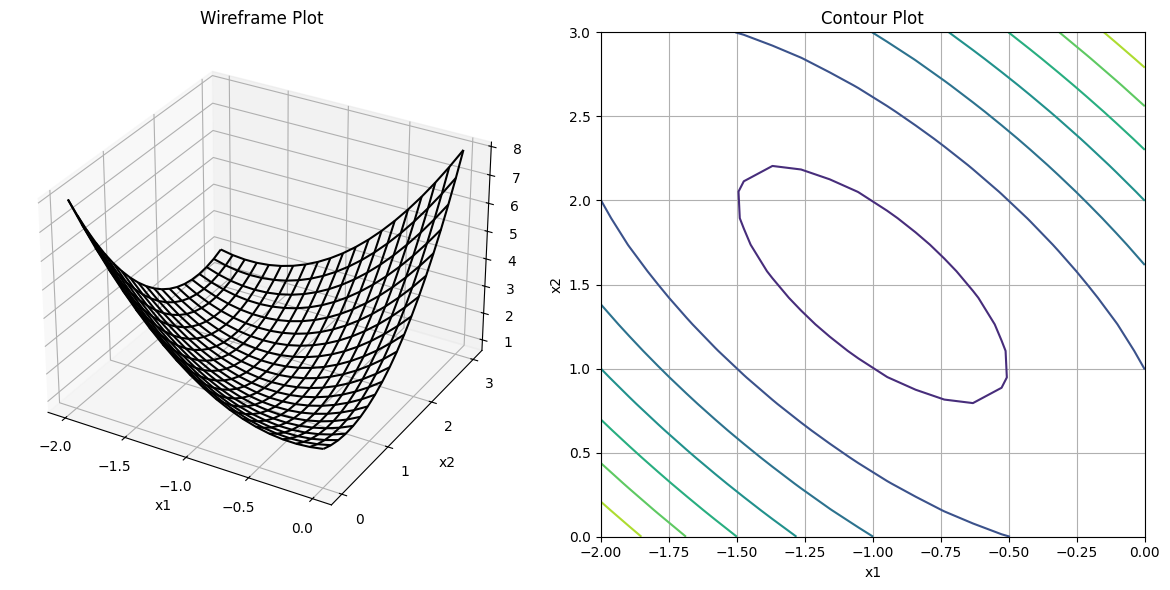

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 생성
x1 = np.linspace(-2, 0, 20)
x2 = np.linspace(0, 3, 20)
X, Y = np.meshgrid(x1, x2)
Z = 2 + X - Y + 2 * X**2 + 2 * X * Y + Y**2

# 서브플롯 설정
fig = plt.figure(figsize=(12, 6)) # 12x6 사이즈의 플롯을 생성

# 첫 번째 서브플롯 (3D wireframe plot)
ax1 = fig.add_subplot(121, projection='3d') # 1행 2열의 첫 번째 서브플롯
ax1.plot_wireframe(X, Y, Z, color='k')
ax1.set_xticks([-2, -1.5, -1, -0.5, 0])
ax1.set_yticks([0, 1, 2, 3])
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Wireframe Plot')

# 두 번째 서브플롯 (contour plot)
ax2 = fig.add_subplot(122) # 1행 2열의 두 번째 서브플롯
contour = ax2.contour(X, Y, Z, cmap='viridis')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Contour Plot')
ax2.grid()

# 플롯 사이의 간격 조정
plt.tight_layout()

# 플롯을 표시
plt.show()


In [ ]:
from scipy.optimize import minimize

def f(x):
    x1 = x[0]
    x2 = x[1]
    return 2+x1-x2+2*x1**2+2*x1*x2+x2**2

x0 = [-0.5,0.5]
result = minimize(f,x0,method='Nelder-Mead',options={'disp':False})
xval = result.x
print(xval)


[-0.99996784  1.49997544]


Nelder-Mead, method='Nelder-Mead'

In [ ]:
from scipy.optimize import minimize
def fun(x):
	return x[0]**2 + x[1]**2
x0 = [1, 1]
result = minimize(fun, x0, method='Nelder-Mead')
print(result)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.0914518324593772e-09
             x: [-2.102e-05  2.548e-05]
           nit: 38
          nfev: 69
 final_simplex: (array([[-2.102e-05,  2.548e-05],
                       [ 5.704e-05,  2.087e-05],
                       [-5.934e-05, -3.333e-05]]), array([ 1.091e-09,  3.690e-09,  4.632e-09]))


In [ ]:
from scipy.optimize import minimize
def fun(x):
	return x[0]**2 + x[1]**2
x0 = [1, 1]
result = minimize(fun, x0, method='Nelder-Mead')
print(result)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.0914518324593772e-09
             x: [-2.102e-05  2.548e-05]
           nit: 38
          nfev: 69
 final_simplex: (array([[-2.102e-05,  2.548e-05],
                       [ 5.704e-05,  2.087e-05],
                       [-5.934e-05, -3.333e-05]]), array([ 1.091e-09,  3.690e-09,  4.632e-09]))


In [ ]:
from scipy.optimize import minimize
def fun(x):
	return x[0]**2 + x[1]**2
x0 = [1, 1]
result = minimize(fun, x0, method='BFGS')
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.311471135620994e-16
        x: [-1.075e-08 -1.075e-08]
      nit: 2
      jac: [-6.600e-09 -6.600e-09]
 hess_inv: [[ 7.500e-01 -2.500e-01]
            [-2.500e-01  7.500e-01]]
     nfev: 9
     njev: 3


In [ ]:
from scipy.optimize import minimize
def fun(x):
	return x[0]**2 + x[1]**2
x0 = [1, 1]
result = minimize(fun, x0, method='Powell')
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0
       x: [ 0.000e+00  0.000e+00]
     nit: 2
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 32


In [ ]:
from scipy.optimize import minimize
def fun(x):
	return x[0]**2 + x[1]**2
x0 = [1, 1]
result = minimize(fun, x0, method='CG')
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.600732072116939e-17
       x: [ 3.606e-09  3.606e-09]
     nit: 2
     jac: [ 2.211e-08  2.211e-08]
    nfev: 12
    njev: 4


trust-krylov 방법을 사용할 때는 반드시 Hessian (이차 도함수 행렬) 정보를 제공해야 합니다. scipy.optimize.minimize 함수에서 trust-krylov 방법은 Hessian을 필요로 하기 때문에 Hessian을 제공하지 않으면 오류가 발생할 수 있습니다.

In [ ]:
from scipy.optimize import minimize

# 함수 정의
def fun(x):
    return x[0]**2 + x[1]**2

# Gradient (일차 도함수) 정의
def jac(x):
    return [2*x[0], 2*x[1]]

# Hessian (이차 도함수 행렬) 정의
def hess(x):
    return [[2, 0], [0, 2]]

# 초기값
x0 = [1, 1]

# 'trust-krylov' 방법을 사용한 최적화
result = minimize(fun, x0, method='trust-krylov', jac=jac, hess=hess)

# 결과 출력
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0
       x: [ 0.000e+00  0.000e+00]
     nit: 2
     jac: [ 0.000e+00  0.000e+00]
    nfev: 3
    njev: 3
    nhev: 2
    hess: [[2 0]
           [0 2]]
